In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('Agg') 
import matplotlib.pyplot as plt
plt.switch_backend('Agg')
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

In [5]:
df = pd.read_csv("dataset/lung_disease_data.csv")
df

Age  Gender Smoking Status  Lung Capacity Disease Type Treatment Type  \
0     71.0  Female             No           4.49         COPD        Therapy   
1     34.0  Female            Yes            NaN   Bronchitis        Surgery   
2     80.0    Male            Yes           1.95         COPD            NaN   
3     40.0  Female            Yes            NaN   Bronchitis     Medication   
4     43.0    Male            Yes           4.60         COPD        Surgery   
...    ...     ...            ...            ...          ...            ...   
5195  40.0    Male             No           1.43  Lung Cancer     Medication   
5196  21.0     NaN            Yes           1.50         COPD     Medication   
5197  42.0  Female             No           5.53    Pneumonia        Surgery   
5198  82.0    Male             No           3.68   Bronchitis     Medication   
5199  45.0  Female            Yes           3.79    Pneumonia     Medication   

      Hospital Visits Recovered  
0                14.0       Yes  
1                 7.0        No  
2                 4.0       Yes  
3                 1.0        No  
4                 NaN       Yes  
...               ...       ...  
5195              1.0       Yes  
5196              4.0        No  
5197              5.0        No  
5198              9.0        No  
5199             10.0       Yes  

[5200 rows x 8 columns]

In [7]:
df.head(5)

Age  Gender Smoking Status  Lung Capacity Disease Type Treatment Type  \
0  71.0  Female             No           4.49         COPD        Therapy   
1  34.0  Female            Yes            NaN   Bronchitis        Surgery   
2  80.0    Male            Yes           1.95         COPD            NaN   
3  40.0  Female            Yes            NaN   Bronchitis     Medication   
4  43.0    Male            Yes           4.60         COPD        Surgery   

   Hospital Visits Recovered  
0             14.0       Yes  
1              7.0        No  
2              4.0       Yes  
3              1.0        No  
4              NaN       Yes

In [9]:
df.isnull().sum()

Age                300
Gender             300
Smoking Status     300
Lung Capacity      300
Disease Type       300
Treatment Type     300
Hospital Visits    300
Recovered          300
dtype: int64

In [11]:
numeric_cols = ['Age', 'Lung Capacity', 'Hospital Visits']
categorical_cols = ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type', 'Recovered']

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in {col} with median value {median_val}")

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in {col} with mode value '{mode_val}'")

df['Recovered_binary'] = df['Recovered'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

print('\nMissing values after imputation:')

Filled missing values in Age with median value 54.0
Filled missing values in Lung Capacity with median value 3.48
Filled missing values in Hospital Visits with median value 8.0
Filled missing values in Gender with mode value 'Female'
Filled missing values in Smoking Status with mode value 'Yes'
Filled missing values in Disease Type with mode value 'Bronchitis'
Filled missing values in Treatment Type with mode value 'Medication'
Filled missing values in Recovered with mode value 'Yes'

Missing values after imputation:


C:\Users\ishau\AppData\Local\Temp\ipykernel_18704\274789679.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\ishau\AppData\Local\Temp\ipykernel_18704\274789679.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [13]:
df.describe()

Age  Lung Capacity  Hospital Visits  Recovered_binary
count  5200.000000    5200.000000      5200.000000       5200.000000
mean     54.423846       3.500604         7.555769          0.536923
std      19.537841       1.418404         3.880942          0.498683
min      20.000000       1.000000         1.000000          0.000000
25%      38.000000       2.290000         4.000000          0.000000
50%      54.000000       3.480000         8.000000          1.000000
75%      71.000000       4.730000        11.000000          1.000000
max      89.000000       6.000000        14.000000          1.000000

In [15]:
df

Age  Gender Smoking Status  Lung Capacity Disease Type Treatment Type  \
0     71.0  Female             No           4.49         COPD        Therapy   
1     34.0  Female            Yes           3.48   Bronchitis        Surgery   
2     80.0    Male            Yes           1.95         COPD     Medication   
3     40.0  Female            Yes           3.48   Bronchitis     Medication   
4     43.0    Male            Yes           4.60         COPD        Surgery   
...    ...     ...            ...            ...          ...            ...   
5195  40.0    Male             No           1.43  Lung Cancer     Medication   
5196  21.0  Female            Yes           1.50         COPD     Medication   
5197  42.0  Female             No           5.53    Pneumonia        Surgery   
5198  82.0    Male             No           3.68   Bronchitis     Medication   
5199  45.0  Female            Yes           3.79    Pneumonia     Medication   

      Hospital Visits Recovered  Recovered_binary  
0                14.0       Yes                 1  
1                 7.0        No                 0  
2                 4.0       Yes                 1  
3                 1.0        No                 0  
4                 8.0       Yes                 1  
...               ...       ...               ...  
5195              1.0       Yes                 1  
5196              4.0        No                 0  
5197              5.0        No                 0  
5198              9.0        No                 0  
5199             10.0       Yes                 1  

[5200 rows x 9 columns]

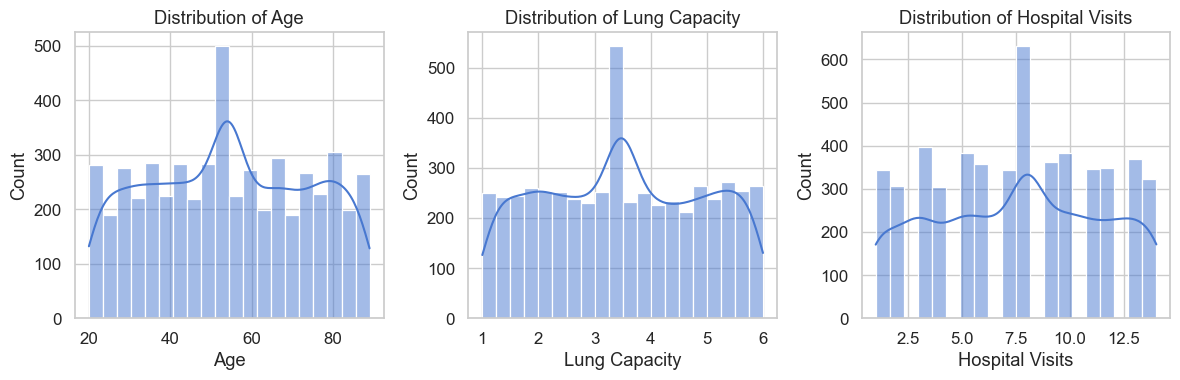

C:\Users\ishau\AppData\Local\Temp\ipykernel_18704\899151826.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')
C:\Users\ishau\AppData\Local\Temp\ipykernel_18704\899151826.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoking Status', data=df, palette='magma')
C:\Users\ishau\AppData\Local\Temp\ipykernel_18704\899151826.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Disease Type', data=df, palette='cool')
C:\Users\ishau\AppData\Local\Temp\ipykernel_18704\899151826.py:24: Future

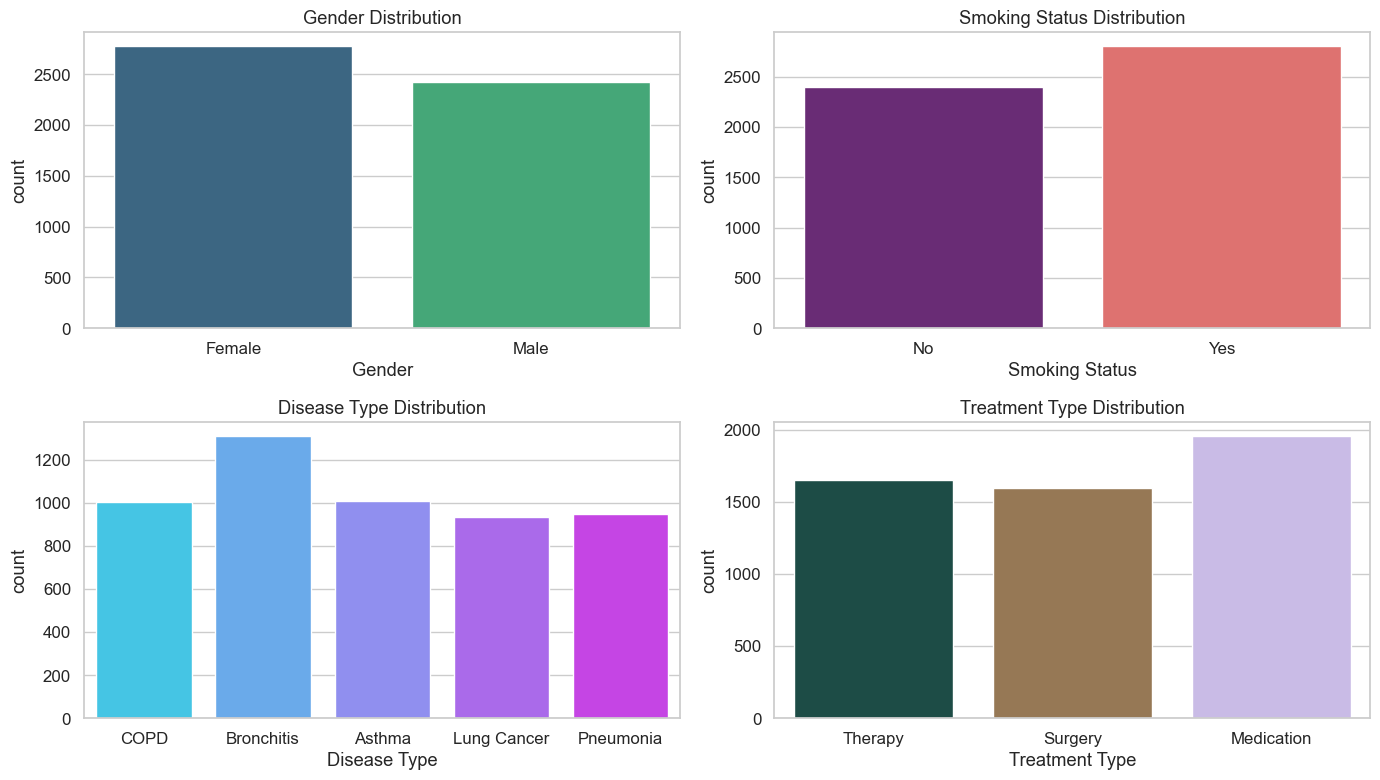

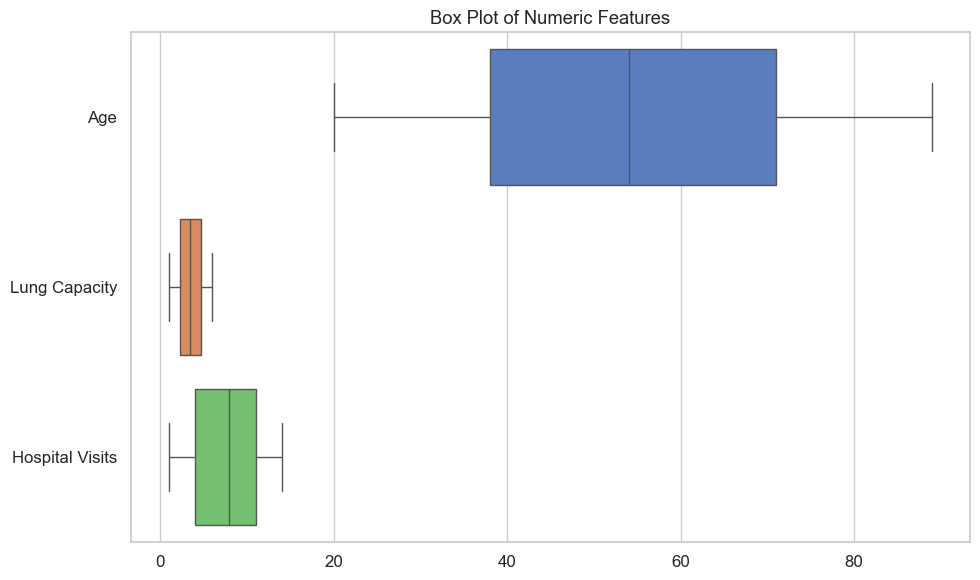

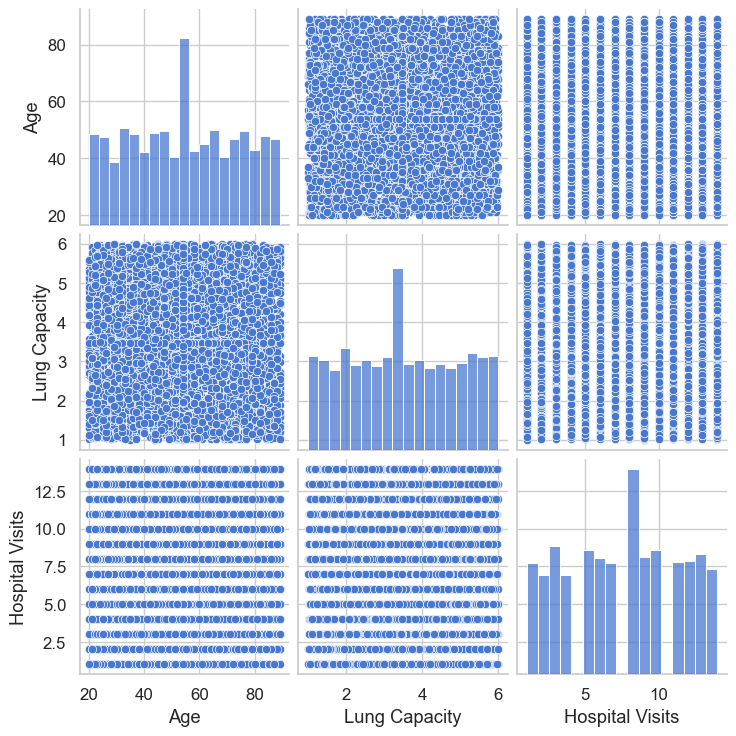

In [17]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Gender Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='Smoking Status', data=df, palette='magma')
plt.title('Smoking Status Distribution')

plt.subplot(2, 2, 3)
sns.countplot(x='Disease Type', data=df, palette='cool')
plt.title('Disease Type Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='Treatment Type', data=df, palette='cubehelix')
plt.title('Treatment Type Distribution')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title('Box Plot of Numeric Features')
plt.tight_layout()
plt.show()

sns.pairplot(df[numeric_cols])
plt.show()

Prediction Accuracy: 55.96%


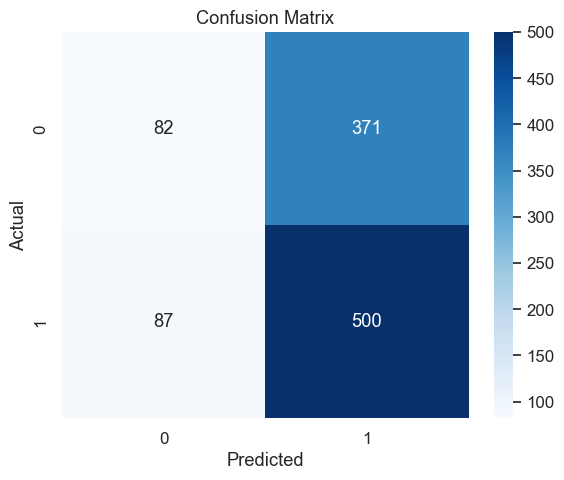

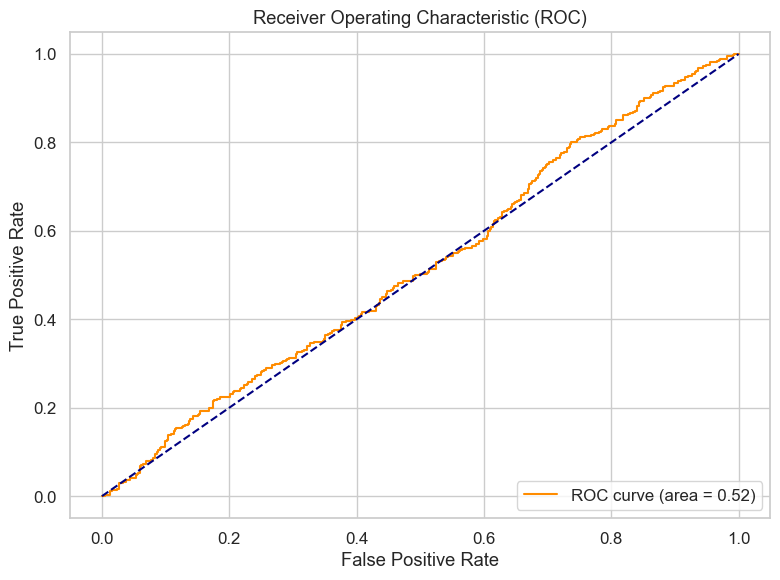

In [27]:
features = ['Age', 'Lung Capacity', 'Hospital Visits']
categorical_features = ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type']


df_model = df[features + categorical_features].copy()


df_encoded = pd.get_dummies(df_model, drop_first=True)

X = df_encoded
y = df['Recovered_binary']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Prediction Accuracy: {:.2f}%'.format(accuracy * 100))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [38]:
import pickle

In [40]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as model.pkl")

Model saved as model.pkl
